# Live Code 2 Phase 0

Nama: Sonny Riadi

Batch: FTDS 009

# Problems

## Nomor 1

Perang sedang berkecamuk! Tentara negara kita ingin melakukan komunikasi ke sekutunya tanpa diketahui oleh negara musuh. Untuk itu, kamu diminta untuk mengubah pesan kalimat menjadi pesan transmisi.

Pesan yang ingin dikirim adalah: "Prepare to negotiate".

### Import Library

In [1]:
import numpy as np

### Mathematical Calculations

##### Konversi dari huruf ke angka

In [2]:
pesan =[]
def encode(text):
    '''Fungsi untuk melakukan encode pesan'''
    for i in str.lower(text):
        if i == " ":
            pesan.append(0)
        if i != " ":
            pesan.append(ord(i)-96)

encode('Prepare to negotiate')

pesan = np.array(pesan)
pesan


array([16, 18,  5, 16,  1, 18,  5,  0, 20, 15,  0, 14,  5,  7, 15, 20,  9,
        1, 20,  5])

##### Melakukan pengecekan jumlah shape

In [3]:
pesan.shape

(20,)

diketahui bahwa pesan berbentuk vektor dengan 20 data

##### Matrix Encoder
![Matrix Encoder](https://camo.githubusercontent.com/e0ce5822aff5c19565b19bbd2eef06c53c4858aafd2521f027ff30a532c545d4/68747470733a2f2f6c617465782e636f6465636f67732e636f6d2f6769662e6c617465783f453d5c626567696e7b626d61747269787d2673706163653b322673706163653b262673706163653b312673706163653b262673706163653b302673706163653b262673706163653b345c5c2673706163653b332673706163653b262673706163653b342673706163653b262673706163653b322673706163653b262673706163653b315c5c2673706163653b312673706163653b262673706163653b312673706163653b262673706163653b392673706163653b262673706163653b305c5c2673706163653b302673706163653b262673706163653b372673706163653b262673706163653b382673706163653b2673706163653b262673706163653b335c656e647b626d61747269787d)

In [4]:
encoder = np.array([
    [2,1,0,4],
    [3,4,2,1],
    [1,1,9,0],
    [0,7,8,3]
])

encoder

array([[2, 1, 0, 4],
       [3, 4, 2, 1],
       [1, 1, 9, 0],
       [0, 7, 8, 3]])

##### Reshape pesan agar memenuhi syarat untuk dikalikan dengan Matrix Encoder

In [5]:
encoder.shape

(4, 4)

diketahui bahwa matriks encoder memiliki 4 baris dan 4 kolom, agar dapat memenuhi aturan perkalian matriks, maka matriks pesan harus dirubah menjadi 5 baris dan 4 kolom


In [6]:
pesan_reshape = pesan.reshape(5,4)
pesan_reshape

array([[16, 18,  5, 16],
       [ 1, 18,  5,  0],
       [20, 15,  0, 14],
       [ 5,  7, 15, 20],
       [ 9,  1, 20,  5]])

##### Perkalian Matrix dengan Encoder

In [7]:
matriks_transmisi = pesan_reshape @ encoder
matriks_transmisi

array([[ 91, 205, 209, 130],
       [ 61,  78,  81,  22],
       [ 85, 178, 142, 137],
       [ 46, 188, 309,  87],
       [ 41,  68, 222,  52]])

### Decode Pesan

inverse dari matriks encoder

In [8]:
encoder_inv = np.linalg.inv(encoder)
encoder_inv

array([[ 0.06325707,  0.25975774,  0.09421265, -0.17092867],
       [-0.11170929,  0.11574697, -0.12382234,  0.11036339],
       [ 0.00538358, -0.04172275,  0.11440108,  0.00672948],
       [ 0.24629879, -0.15881561, -0.01615074,  0.05787349]])

perkalian matrik transmisi dengan inverse matriks encoder

In [9]:
decode = np.around(matriks_transmisi @ encoder_inv)
decode

array([[16., 18.,  5., 16.],
       [ 1., 18.,  5.,  0.],
       [20., 15.,  0., 14.],
       [ 5.,  7., 15., 20.],
       [ 9.,  1., 20.,  5.]])

check apakah hasil decode sudah sesuai

In [10]:
np.allclose(pesan_reshape,decode)

True

### Hasil

1. Pada langkah c, berapa ukuran matriks yang pesan yang memungkinkan untuk dapat dikalikan dengan matriks encoder? dan mengapa jawabannya demikian?\

    `berdasarkan aturan perkalian matriks diketahui terdapat sebuah syarat yaitu kolom matriks A = Baris Matriks B`\
    `diketahui bahwa matriks encoder terdiri dari 4 baris dan 4 kolom (4*4). maka,`\
    `jika perkalian matriks pesan @ matriks encoder, maka ukuran matriks pesan yang memungkinkan yaitu dengan ukuran 5 * 4 (5 baris dan 4 kolom)`\
    `jika perkalian matriks encoder @ matriks pesan, maka ukuran matriks pesan yang memungkinkan yaitu dengan ukuran 4 * 5 (4 baris dan 5 kolom)`



2. Apakah susunan perkalian yang benar antara matriks pesan x matriks encoder atau matriks encoder x matriks pesan sama saja? jika sama, mengapa? dan jika berbeda mengapa demikian dan susunan mana yang benar?

    `Tidak sama, dikarenakan dalam aturan perkalian matriks, terdapat persayaratan yaitu kolom matriks A harus sama dengan baris Matriks B, dalam cases dapat diketahui bahwa matriks pesan memiliki 5 baris dan 4 kolom sementara matriks encoder memiliki 4 baris dan 4 kolom. sehingga jika susnan perkalian ditukar maka syarat perkalian matriks tidak dapat terpenuhi`




3. Pada langkah f, untuk melakukan decoding, digunakan perkalian antara matriks transmisi dengan inverse matriks encoder dimana harapannya hasil perkaliannya menghasilkan matriks yang sama/mirip dengan matriks pesan. Mengapa mengalikan matriks transmisi dengan inverse matriks encoder dan mengapa tidak dengan matriks encoder biasa saja tanpa di-inverse?\
`Diketahui bahwa Matriks Transmisi adalah hasil perkalian dari Matriks Pesan dan Matriks Encoder, maka untuk melakukan decoder Matriks transmisi perlu di kalikan dengan inverse matriks encoder atau pangkat-1 dari matriks encoder agar dapat kembali ke matriks bentuk semula. jika dikalikan kembali dengan matriks encoder biasa maka matriks transmisi akan mengalami 2 kali encode `

## Nomor 2

Dalam training data dengan model machine learning, salah satu metrik yang dapat dijadikan referensi untuk mengevaluasi kecocokan antara model dan data adalah ROC (Receiver Operating Charateristics) curve. ROC curve dibangun dari hubungan antara False Positive Rate/FPR (sumbu X) dan True Positive Rate/TPR (sumbu Y), masing-masing bernilai dari 0-1. Selain ROC Curve, kadangkala orang mengevaluasi model menggunakan ROC AUC score yang tidak lain adalah luas area di bawah kurva ROC. Untuk menghitung ROC AUC score, gunakan konsep integral.

### Import Library

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate

### Loading Data

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/ROC%20Curve%20SVR%20-%20Random%20Forest.csv?token=AEZDEHVS66CKQBUSHKZ534TA44EVO')

In [13]:
df.set_index('Unnamed: 0',inplace=True)
df.head()

,svr_fpr,svr_tpr,rfr_fpr,rfr_tpr
Unnamed: 0,,,,
0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.015152,0.000000,0.030303
2,0.004831,0.030303,0.000000,0.060606
3,0.009662,0.030303,0.000000,0.106061
4,0.012077,0.045455,0.002415,0.121212


Keterangan kolom:

    svr_fpr = False Positive Rate model SVR
    svr_tpr = True Positive Rate model SVR
    rfr_fpr = False Positive Rate model Random Forest
    rfr_tpr = True Positive Rate model Random Forest


##### Pada dataset yang tersedia, hitung nilai ROC AUC score untuk masing-masing model Random Forest Regressor dan Support Machine Regressor (SVR). Manakah yang terbaik?

### Matehematical Calculation

### Jawaban dari Pertanyaan sebelum menyelesaikan problem dengan code

1. Jenis integral apakah untuk menghitung luas area di bawah kurva ROC? mengapa demikian?\
   `integral yang digukanan adalah integral numeric data-array, hal tersebut dikarenakan kita sudah memiliki data x dan y berbentuk array`


2. Untuk menyelesaikan persoalan menghitung ROC AUC score, metode apa yang kita pakai, simbolik atau numerik? apakah perlu pendefinisian fungsi matematis?\
`Metode yang dipakai adalah metode numerik data-array, tidak perlu pendefinisian fungsi matematis`

##### Menghitung ROC AUC Score model SVR

##### define variable x dan y

In [14]:
svr_x = df['svr_fpr']
svr_y = df['svr_tpr']

##### plot data x dan y

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

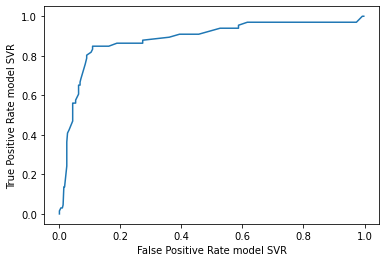

In [15]:
plt.plot(svr_x,svr_y)
plt.xlabel('False Positive Rate model SVR', fontsize=10)
plt.ylabel('True Positive Rate model SVR', fontsize=10)
plt.imshow

##### menghitung dengan integral trapezoid

In [16]:
score_svr = integrate.trapz(svr_y,svr_x)
print(score_svr)

0.8817889035280342


##### Menghitung ROC AUC Score model RFR

##### define variable x dan y

In [17]:
rfr_x = df['rfr_fpr']
rfr_y = df['rfr_tpr']

##### plot data x dan y

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

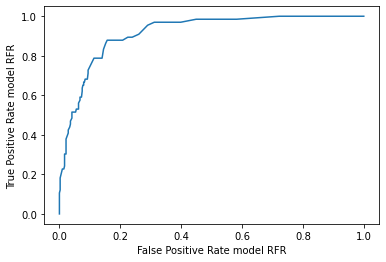

In [18]:
plt.plot(rfr_x,rfr_y)
plt.xlabel('False Positive Rate model RFR', fontsize=10)
plt.ylabel('True Positive Rate model RFR', fontsize=10)
plt.imshow

##### Menghitung dengan integral trapezoid

In [19]:
score_rfr = integrate.trapz(rfr_y,rfr_x)
print(score_rfr)

0.9160262040696824


### Hasil

3. Manakah model yang terbaik berdasarkan hasil perhitungan ROC AUC score? jelaskan mengapa!\
`Dapat diketahui bahwa model terbaik adalah model yang memiliki nilai paling besar dan mendekati 1, maka model yang terbaik adalah model RFR dengan nilai score yaitu 0.9160. `